In [11]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from gtts import gTTS
import matplotlib
import numpy 
from traitlets.config.manager import BaseJSONConfigManager
path = "/Users/Kristen/anaconda3/envs/py36/etc/jupyter/nbconfig"
cm = BaseJSONConfigManager(config_dir=path)
cm.update("livereveal", {"autolaunch": True,
                         "theme": "sky",
                        } 
)



#Supress default INFO logging
# The UT Dallas Art Science Lab Training module 
print ("Sonification Training Module v0.5.2")
print("\nDeveloped by the ArtSciLab at UT Dallas")
print("\n")
print("Plucked String Time Series Training Module" )
print("\n")
print("\nBasic Instructions for each cell :")
print('1. Press Shift + Enter to initiate display')
print("2. Press Space Bar to proceed to the next cell")
print("\n")
print("Volume controls are located in the top row of the keyboard if you need to adjust the volume at any time")

Sonification Training Module v0.5.2

Developed by the ArtSciLab at UT Dallas


Plucked String Time Series Training Module



Basic Instructions for each cell :
1. Press Shift + Enter to initiate display
2. Press Space Bar to proceed to the next cell


Volume controls are located in the top row of the keyboard if you need to adjust the volume at any time


In [9]:
%%HTML
# Press Shift+Enter and click Play to watch the video
</br>
<video width="640" height="480" controls>
  <source src="dep/videos/pluckTraining.mp4" type="video/mp4">
</video>
</br>
<b>   After you watch the video, then press Space Bar to proceed to the next cell</b>




### In the next part, you will be given a new graph like the one you saw in the video 
### You task is to trace along the line and "hear" the data of the graph.

#### Press the Space Bar to proceed

Press Shift+Enter to initiate display


<IPython.core.display.Javascript object>


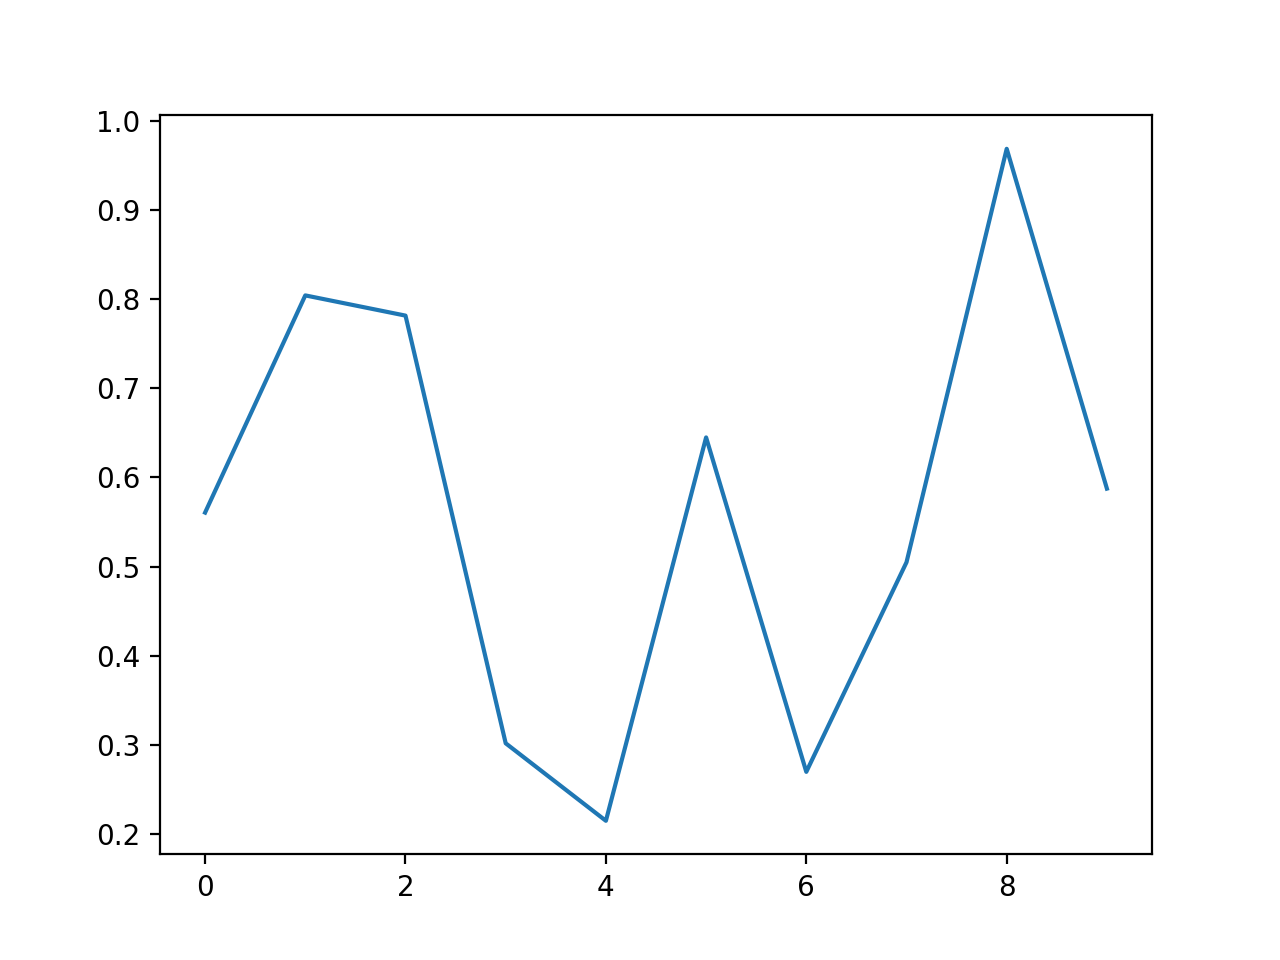

In [10]:
%matplotlib notebook

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from gtts import gTTS
import os

import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

import pandas as pd
import ctcsound
import time

print("Press Shift+Enter to initiate display")

try:
    pt
except NameError:
    var_exists = False
else:
    pt.stop()
    pt.join()
    time.sleep(2)

cs = ctcsound.Csound()
csd_string = '''
<CsoundSynthesizer>
<CsOptions>
; Select audio/midi flags here according to platform
-odac    ;;;realtime audio out
;-iadc    ;;;uncomment -iadc if real audio input is needed too
; For Non-realtime ouput leave only the line below:
; -o pluck.wav -W ;;; for file output any platform
</CsOptions>
<CsInstruments>

sr = 44100
ksmps = 32
nchnls = 2
0dbfs  = 1

instr 1

kcps = p4
icps = p5
ifn  = 0
imeth = p6

asig pluck 0.7, kcps, icps, ifn, imeth, .1, 10
     outs asig, asig

endin
</CsInstruments>

<CsScore>
f 0 14400


</CsScore>

</CsoundSynthesizer>
'''

cs.compileCsdText(csd_string)
cs.start()



index = 0
fig = plt.figure()
ax = fig.add_subplot(111)


ax.plot(np.random.rand(10))

pt = ctcsound.CsoundPerformanceThread(cs.csound())
pt.play()


def onclick(event):
    in_min  = 0
    in_max = 1
    out_min= 220
    out_max = 800


    global index
    index = event.ydata
    #print (index) //we will not be speaking the numerical representation
    #tts = gTTS(text=(str(index)+'percent'), lang='en')
    #tts.save("num.mp3")
    #os.system("afplay num.mp3")
    
    freq = (index - in_min) * (out_max - out_min) / (in_max - in_min) + out_min  
    #print(freq)  

    pt.scoreEvent(False, 'i', (1, 0, 5, freq, 220, 1))

cid = fig.canvas.mpl_connect('button_press_event', onclick)


## You have completed the Training Module


Now that you have the general idea of this sound representation,
it is time to move on to the next phase where you can explore this sonification. 

Please close this tab and open the next module from the list of notebooks:  


<b>9. Plucked String Time Series Exploration Module</b>